In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Ford
## Texas Data
df_TX_1 = pd.read_csv('Ford_TX.csv')
df_TX_1['state'] = 'TX'
df_TX_2 = pd.read_csv('Ford_TX2.csv')
df_TX_2['state'] = 'TX'
df_TX_3 = pd.read_csv('Toyota_TX.csv')
df_TX_3['state'] = 'TX'
## NY Data
df_NY_1 = pd.read_csv('Ford_NY_1.csv')
df_NY_1['state'] = 'NY'
df_NY_2 = pd.read_csv('Ford_NY_2.csv')
df_NY_2['state'] = 'NY'
## California Data
df_CA = pd.read_csv('Ford_CA.csv')
df_CA['state']='CA'

### Merging/Cleaning all data 

In [4]:
df = pd.concat([df_TX_1,df_TX_2,df_TX_3,df_NY_1,df_NY_2,df_CA],axis=0).reset_index(drop=True)
df.shape

(2631, 14)

In [5]:
df.drop('Unnamed: 0', axis=1 , inplace=True)
df.head()

,car_mileage,car_price,car_mpg,car_model_year,car_model,car_make,car_color,car_transmission,car_engine_size,car_horse_power,car_engine_cylinder,car_msrp_price,state
0,93K miles,"$13,998*",['22/33 mpg'],2015,Fusion Titanium,Ford,Red,Automatic,2.0,240.0,4.0,30800.0,TX
1,115K miles,"$36,998*",['12/17 mpg'],2015,F250 XLT,Ford,Silver,Automatic,6.7,400.0,8.0,38300.0,TX
2,35K miles,"$20,998*",['19/27 mpg'],2018,Transit Connect XLT,Ford,Gray,Automatic,2.5,169.0,4.0,28000.0,TX
3,7K miles,N/A*,['22/28 mpg'],2017,Escape Titanium,Ford,Black,Automatic,1.5,179.0,4.0,31000.0,TX
4,44K miles,"$25,998*",['18/23 mpg'],2015,F150 XL,Ford,Red,Automatic,2.7,325.0,6.0,33600.0,TX


In [6]:
#Clean/Convert car_mileage to float number
df["car_mileage"] = df["car_mileage"].str.split("K").str[0].astype('float')*1000

In [7]:
# Clean/Convert car_price to float number
df['car_price'] = df['car_price'].str.replace("$","").str.replace("*","").str.replace(",","").str.replace("N/A",'0').astype('float')
#df_final = df_final[(df_final['car_price'] != 'N/A') | (df_final['car_price'] != 'NaN') | (df_final['car_price'] != np.nan)].astype('float')
df.loc[df['car_price']==0] = np.nan
df.shape

(2631, 13)

In [8]:
# dropping the null columns in car_prices
df = df[pd.notnull(df['car_price'])]
df.shape

(2376, 13)

In [9]:
# Separating the Car model and car make
df[['car_model','Trim']] = df['car_model'].str.split(" ",1,expand=True)

In [10]:
# Clean and separate city/highway MPG
df['car_mpg'] = df['car_mpg'].str.replace("[","").str.replace("'","").str.replace("]","").str.replace(" mpg","").str.replace('nan','0/0')
df[['City_MPG','Highway_MGP']] = df['car_mpg'].str.split("/",expand=True)
df.drop('car_mpg',axis=1,inplace=True)

In [11]:
# Creating two new columns
df['car_age'] = 2021 - df['car_model_year']
df['depreciation'] = df['car_msrp_price']-df['car_price']
df['depreciation_percent'] = 100*df['depreciation']/df['car_msrp_price']

In [12]:
df['car_model_year'] = df['car_model_year'].astype('int')

In [14]:
df.car_make.value_counts()

Ford      1901
Toyota     475
Name: car_make, dtype: int64

In [13]:
df.car_model_year.value_counts()

2017    494
2018    458
2019    346
2016    257
2015    201
2014    175
2013    156
2020    137
2012     67
2011     46
2010     27
2009     12
Name: car_model_year, dtype: int64

In [15]:
# Filtering the data based on dates after 2012
print(df.shape)
df = df[df['car_model_year']>2012]
print(df.shape)

(2376, 18)
(2224, 18)


In [137]:
#ax = df.groupby(['car_make','car_model_year']).depreciation_percent.mean().plot(c='k',ls='--');
#ax.set_title('Depreciataion percent',size=15,c='k');

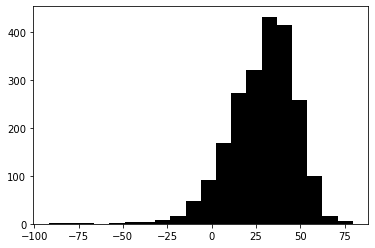

In [18]:
df['depreciation_percent'].hist(grid=False,color='k',bins=20);

Text(0, 0.5, 'Number of Cars')

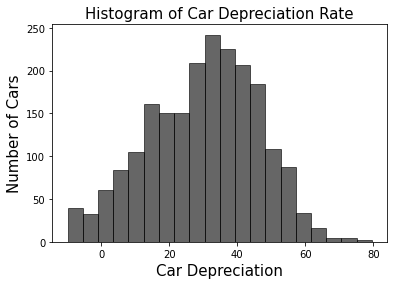

In [29]:
# Removing the data with depreciation less than -10
df = df[df['depreciation_percent']>-10]
ax = df['depreciation_percent'].hist(grid=False,color='k',bins=20,edgecolor="k",alpha=0.6);
ax.set_title('Histogram of Car Depreciation Rate',size=15)
ax.set_xlabel('Car Depreciation',size=15)
ax.set_ylabel('Number of Cars',size=15)

In [25]:
df[df.depreciation<-10]

,car_mileage,car_price,car_model_year,car_model,car_make,car_color,car_transmission,car_engine_size,car_horse_power,car_engine_cylinder,car_msrp_price,state,Trim,City_MPG,Highway_MGP,car_age,depreciation,depreciation_percent
63,68000.0,53998.0,2018,F150,Ford,White,Automatic,3.5,450.0,6.0,53700.0,TX,SVT Raptor,15,18,3.0,-298.0,-0.554935
64,29000.0,38998.0,2018,F150,Ford,Blue,Automatic,5.0,385.0,8.0,37800.0,TX,XLT,16,22,3.0,-1198.0,-3.169312
79,4000.0,34998.0,2019,F150,Ford,White,Automatic,2.7,325.0,6.0,34700.0,TX,XLT,0,0,2.0,-298.0,-0.858790
160,9000.0,34998.0,2017,Mustang,Ford,Red,Manual 6 Speed,5.0,435.0,8.0,33200.0,TX,GT,0,0,4.0,-1798.0,-5.415663
182,69000.0,36998.0,2017,F150,Ford,Black,Automatic,5.0,NaN,8.0,33700.0,TX,Lariat,0,0,4.0,-3298.0,-9.786350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,77000.0,38998.0,2017,F150,Ford,Gray,Automatic,3.5,375.0,6.0,37160.0,CA,Lariat,17,23,4.0,-1838.0,-4.946179
2489,13000.0,37998.0,2018,F150,Ford,Red,Automatic,2.7,325.0,6.0,37800.0,CA,XLT,19,24,3.0,-198.0,-0.523810
2592,15000.0,37998.0,2019,F250,Ford,White,Automatic,6.2,385.0,8.0,35945.0,CA,XL,0,0,2.0,-2053.0,-5.711504
2620,17000.0,32998.0,2015,Mustang,Ford,Blue,Automatic,5.0,435.0,8.0,32300.0,CA,50 Year Limited Edition,16,25,6.0,-698.0,-2.160991


In [30]:
#df.plot('car_model_year',kind='bar')#.value_counts().sort_index()

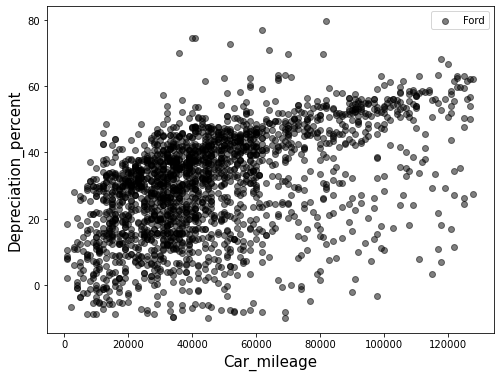

In [138]:
fig , ax = plt.subplots(figsize=(8,6))
ax.scatter(x=df.car_mileage,y=df.depreciation_percent,alpha=0.5,c='k',label='Ford');
ax.set_xlabel('Car_mileage',size=15);
ax.set_ylabel('Depreciation_percent',size=15);
ax.legend()

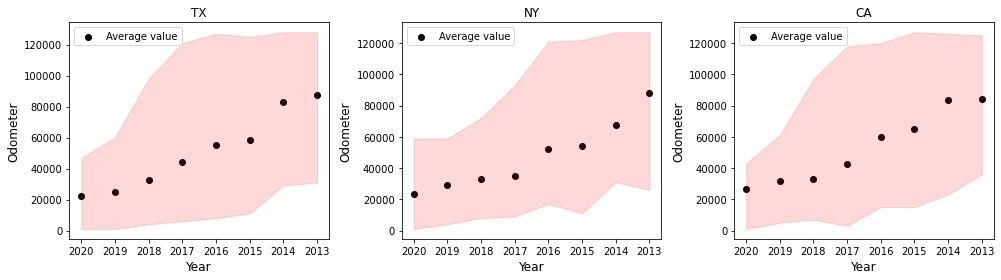

In [136]:
fig,axs = plt.subplots(1,3,figsize=(14,4))
text_size = 12

for i,state in enumerate(df.state.unique()):
    mean_mileage = df[df.state==state].groupby('car_model_year').car_mileage.mean()
    max_mileage = df[df.state==state].groupby('car_model_year').car_mileage.max()
    min_mileage = df[df.state==state].groupby('car_model_year').car_mileage.min()

    axs[i].set_title(state,size = text_size)
    axs[i].set_xlabel('Year',size = text_size)
    axs[i].set_ylabel('Odometer',size = text_size)
    axs[i].scatter(mean_mileage.index,mean_mileage.values,color='k',label='Average value')
    axs[i].invert_xaxis()
    axs[i].fill_between(mean_mileage.index, min_mileage.values, max_mileage.values, color='red',alpha=0.15)
    axs[i].legend(loc='upper left')

plt.tight_layout()

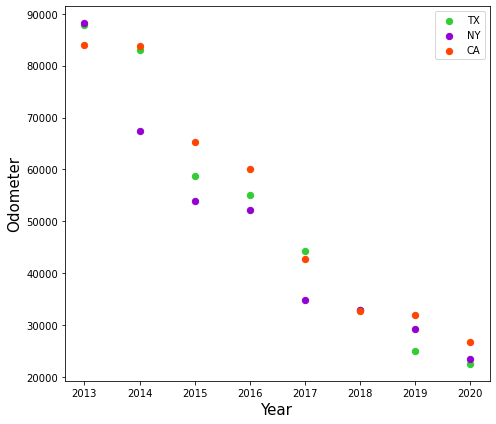

In [177]:
fig,ax = plt.subplots(figsize=(7,6))
text_size = 15
colors = ['limegreen','darkviolet','orangered']
for i,state in enumerate(df.state.unique()):
    mean_mileage = df[df.state==state].groupby('car_model_year').car_mileage.mean()
    ax.scatter(mean_mileage.index,mean_mileage.values,color=colors[i],label=state,s=40)
  
ax.set_xlabel('Year',size = text_size)
ax.set_ylabel('Odometer',size = text_size)
ax.legend(loc='upper right')   
plt.tight_layout()

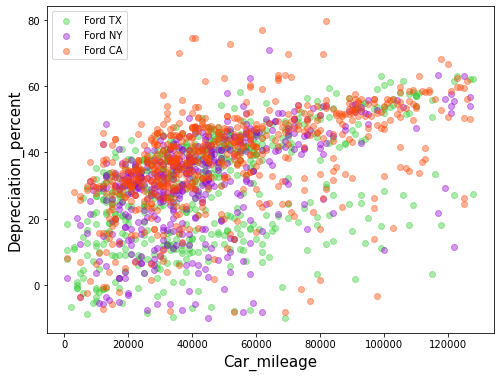

In [175]:
fig , ax = plt.subplots(figsize=(8,6))
colors = ['limegreen','darkviolet','orangered']

for i,state in enumerate(df.state.unique()):
    ax.scatter(x=df[(df.state==state) & (df.car_make=='Ford')].car_mileage,y=df[(df.state==state) & 
              (df.car_make=='Ford')].depreciation_percent,alpha=0.4,c=colors[i],label=f'Ford {state}');

ax.set_xlabel('Car_mileage',size=15);
ax.set_ylabel('Depreciation_percent',size=15);
ax.legend();

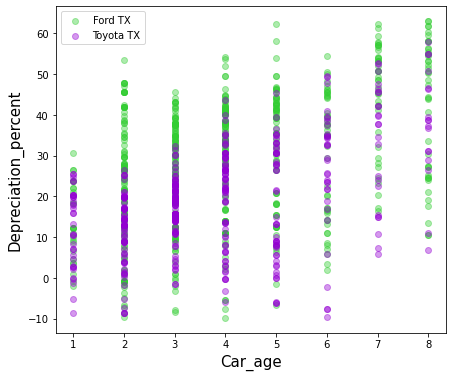

In [173]:
fig , ax = plt.subplots(figsize=(7,6))
colors = ['limegreen','darkviolet','orangered']

ax.scatter(x=df[(df.state=='TX') & (df.car_make=='Ford')].car_age,y=df[(df.state=='TX') & (df.car_make=='Ford')].depreciation_percent,alpha=0.4,c=colors[0],label=f'Ford TX');
ax.scatter(x=df[(df.state=='TX') & (df.car_make=='Toyota')].car_age,y=df[(df.state=='TX') & (df.car_make=='Toyota')].depreciation_percent,alpha=0.4,c=colors[1],label=f'Toyota TX');


ax.set_xlabel('Car_age',size=15);
ax.set_ylabel('Depreciation_percent',size=15);
ax.legend();

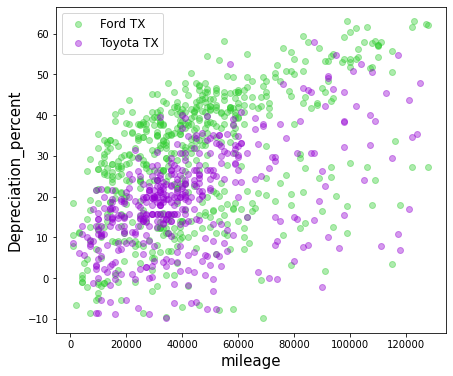

In [174]:
fig , ax = plt.subplots(figsize=(7,6))
colors = ['limegreen','darkviolet','orangered']

ax.scatter(x=df[(df.state=='TX') & (df.car_make=='Ford')].car_mileage,y=df[(df.state=='TX') & (df.car_make=='Ford')].depreciation_percent,alpha=0.4,c=colors[0],label=f'Ford TX');
ax.scatter(x=df[(df.state=='TX') & (df.car_make=='Toyota')].car_mileage,y=df[(df.state=='TX') & (df.car_make=='Toyota')].depreciation_percent,alpha=0.4,c=colors[1],label=f'Toyota TX');


ax.set_xlabel('mileage',size=15);
ax.set_ylabel('Depreciation_percent',size=15);
ax.legend(prop={'size': 12});